In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
from pathlib import Path
# import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go   
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #this is to diplay figures in notebook
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import*

In [2]:
import os
os.listdir

<function posix.listdir(path=None)>

In [3]:
df= pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [10]:
df["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [11]:
df["region"].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [12]:
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
#df['sex_num']=df['sex'].map({'female':0, 'male':1})
#df['sex_num'].value_counts()

In [14]:
#df['smoker_num']=df['smoker'].map({'yes':0, 'no':1})

In [15]:
#df['region_num']=df['region'].map({'southwest':0,'southeast':1, 'northwest':2, 'northeast':3 })

# Check missing data

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [17]:
df.isnull().count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
expenses    1337
dtype: int64

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
corrs = df.corr()
corrs['expenses'].sort_values()

children    0.067389
bmi         0.198637
age         0.298308
expenses    1.000000
Name: expenses, dtype: float64

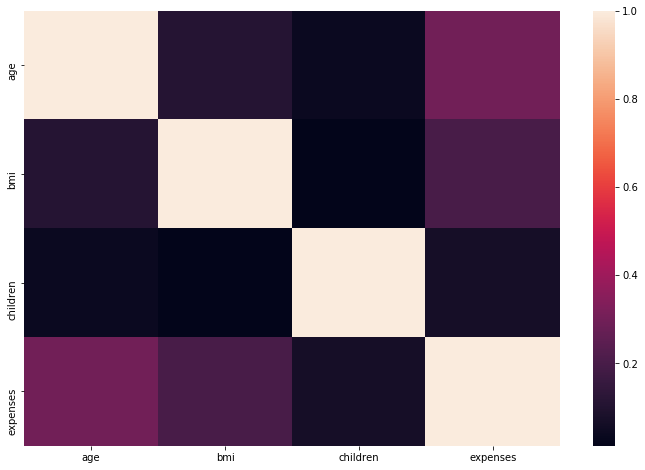

In [20]:
# Display all this as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

In [21]:
grouped=df.groupby(['smoker','sex'])['expenses'].mean()
grouped.head(5)

smoker  sex   
no      female     8762.297367
        male       8099.700407
yes     female    30678.996261
        male      33042.006226
Name: expenses, dtype: float64

# Variable

In [22]:
df['sex']=df['sex'].map({'female':0, 'male':1})
df['sex'].value_counts()

1    675
0    662
Name: sex, dtype: int64

In [23]:
df['smoker']=df['smoker'].map({'yes':0, 'no':1})
df['smoker'].value_counts()

1    1063
0     274
Name: smoker, dtype: int64

In [56]:
df['bmi'].describe()

count    1337.000000
mean       30.665520
std         6.100664
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,southwest,16884.92
1,18,1,33.8,1,1,southeast,1725.55
2,28,1,33.0,3,1,southeast,4449.46
3,33,1,22.7,0,1,northwest,21984.47
4,32,1,28.9,0,1,northwest,3866.86


In [25]:
feature_columns=df[['age','sex','bmi','children','smoker']]

## Scale

In [26]:
# standardize our variables
from sklearn.preprocessing import StandardScaler
# instantiate the SKLearn class
std_scaler=StandardScaler()

In [27]:
# "fit" the scaler to our data & then transform the data to the new parameters
scaled=std_scaler.fit(feature_columns)

In [28]:
scaled_columns = std_scaler.transform(feature_columns)

In [29]:
# pickle the fitted scaler
import pickle
filename = open('fitted_scaler.pkl', 'wb')
pickle.dump(std_scaler, filename)
filename.close()

In [30]:
feature_columns.isnull().count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
dtype: int64

In [31]:
scaled_df = pd.DataFrame(scaled_columns, columns=feature_columns.columns)
scaled_df.head()

,age,sex,bmi,children,smoker
0,-1.440418,-1.009771,-0.453484,-0.909234,-1.969660
1,-1.511647,0.990324,0.513986,-0.079442,0.507702
2,-0.799350,0.990324,0.382803,1.580143,0.507702
3,-0.443201,0.990324,-1.306169,-0.909234,0.507702
4,-0.514431,0.990324,-0.289506,-0.909234,0.507702


## Modeling

In [32]:
# Declare the target variable
y= df['expenses'].copy()
y[:5]

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [33]:
X=scaled_df
X[0:5]

,age,sex,bmi,children,smoker
0,-1.440418,-1.009771,-0.453484,-0.909234,-1.969660
1,-1.511647,0.990324,0.513986,-0.079442,0.507702
2,-0.799350,0.990324,0.382803,1.580143,0.507702
3,-0.443201,0.990324,-1.306169,-0.909234,0.507702
4,-0.514431,0.990324,-0.289506,-0.909234,0.507702


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [36]:
X_train.shape

(935, 5)

In [37]:
X_test.shape

(402, 5)

In [38]:
# instantiating the SKlearn class
my_model = LinearRegression()

In [39]:
my_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_preds=my_model.predict(X_test)
y_preds[:5]

array([ 7652.99528418,  5772.34576184, 14194.04608399, 31283.67028332,
        9149.81557945])

In [41]:
# Take a look at the first few predictions and compare to the true values
[round(x,2) for x in y_preds[:5]]

[7653.0, 5772.35, 14194.05, 31283.67, 9149.82]

In [42]:
# Compare that to the actual runs of the first five players
list(y_test[:5])

[8688.86, 5708.87, 11436.74, 38746.36, 4463.21]

In [43]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

6261.565073210322

In [44]:
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.77

In [45]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
avg_val

13035.065935828872

In [46]:
# what would the error be if I simply predicted the average value for all players?
comparison = np.full((len(y_test), ), avg_val)
comparison

array([13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
       13035.06593583, 13035.06593583, 13035.06593583, 13035.06593583,
      

In [47]:
# compare that to our predictions
y_preds

array([ 7652.99528418,  5772.34576184, 14194.04608399, 31283.67028332,
        9149.81557945, 13417.0488382 , 29543.40997124,  1481.71940603,
       10864.23993064, 11183.71569452, 10335.10926415, 32809.84511536,
       30228.70235225, 17521.71921408, 10155.05947782,  9644.34292265,
        4146.46507542, 31741.86278136,  3272.77786559,  5442.64812395,
        3706.48393052, 29482.31729492, 15137.29521771, 30334.74443095,
       30637.74995765,  5204.20631414, 35507.00153769, 36526.58264999,
       10874.43508787, 13624.68721185,  5890.57280994, 13015.9447739 ,
         596.83557901, 12278.05568093, 39680.2323775 , 12446.96228364,
        4714.55858507,  3739.34773512, 31022.7374648 ,  9268.82612303,
        6346.01871711, 29357.71579526, 34818.90913224, 11762.34091875,
        7255.17101275,  3469.01686389,  5491.89238821,  9075.43308721,
        4028.73300206,  9257.55685102,  6785.22947427, 11464.67765193,
       30492.65877192,  3712.27924205, 11114.22642546, 10019.23464418,
      

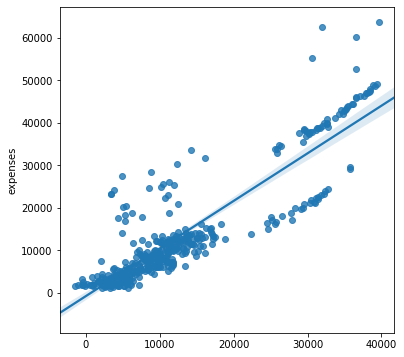

In [48]:
# Third metric: scatterplot
plt.figure(figsize=(6,6))
sns.regplot(x = y_preds, y = y_test);

In [49]:
# pickle your model!
import pickle
filename = open('final_model.pkl', 'wb')
pickle.dump(my_model, filename)
filename.close()

# Predict on new data

In [50]:
X.loc[1].array

<PandasArray>
[ -1.5116474702606657,   0.9903235535625419,   0.5139855484706017,
 -0.07944161966998751,    0.507701736870995]
Length: 5, dtype: float64

In [51]:
new_data=[[-1.6,1.1,0.49,-0.08,0.52]]

In [52]:
my_model.predict(new_data)

array([3413.89415922])